Paquetes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import numpy as np

Base

In [2]:
version = "2_RESULTS"

In [3]:
df = pd.read_excel(f"(20240122)time_levelex(inputorientation) - copia.xlsx")

In [4]:
columnas = list(df.columns)

In [5]:
fdhs    = [i for i in columnas if i.endswith('_fdh')]
inputs  = [i.replace("_fdh", "_in") for i in fdhs ]
outputs = [i.replace("_fdh", "_out") for i in fdhs ]
variables = [i.replace("fdh", "") for i in fdhs]

ids = ["Country Code", "Time"]
años = list(df.Time.unique())

In [6]:
nombres = ["Seg. energética", "Transporte", "Prot. Social", "Educación", "Salud", "Vivienda", "Prot. ambiental", "Asun. Eco", "Orden público", "Defensa y s.dad", "Servicios generales", "IIIP"]


In [7]:
for i,e in zip(nombres, fdhs):
    df = df.rename(columns = {e:i})


## Heat Maps por sector

In [8]:
inicio = 0
fin = 200

<ipython-input-18-1fd2f207892d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg[i] = np.abs(dfg[i])
<ipython-input-18-1fd2f207892d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg[i] = np.abs(dfg[i])
<ipython-input-18-1fd2f207892d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

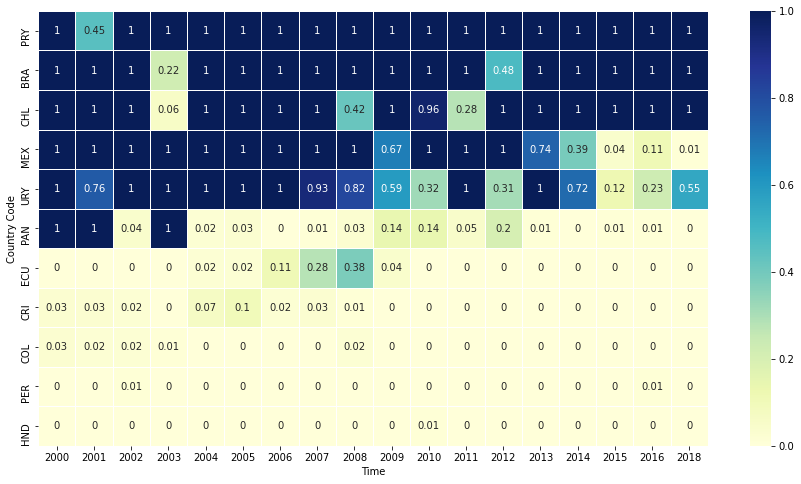

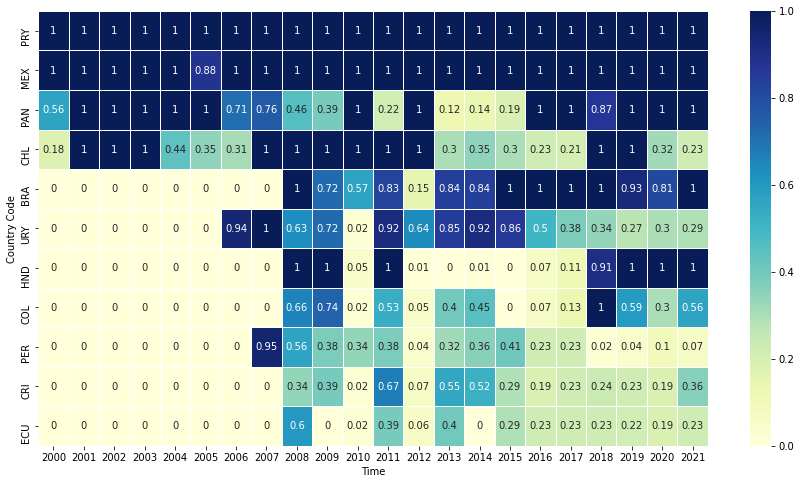

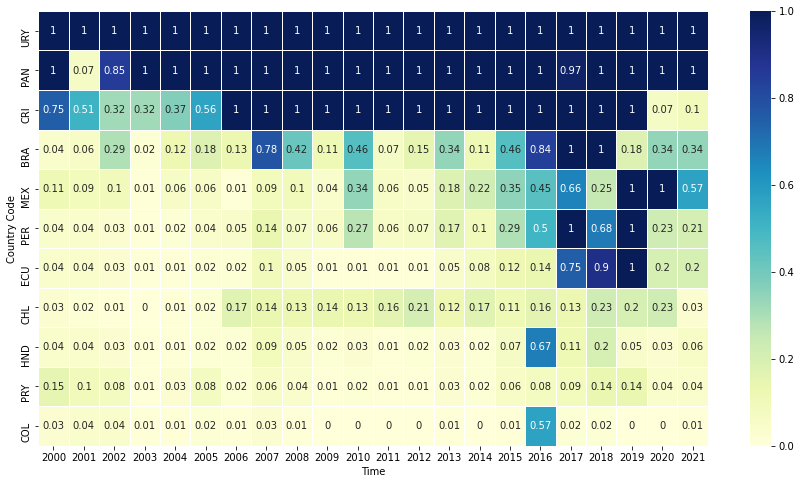

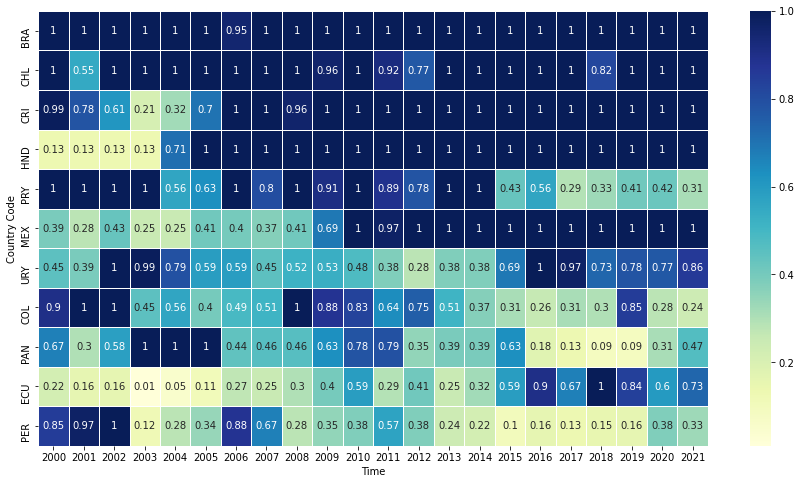

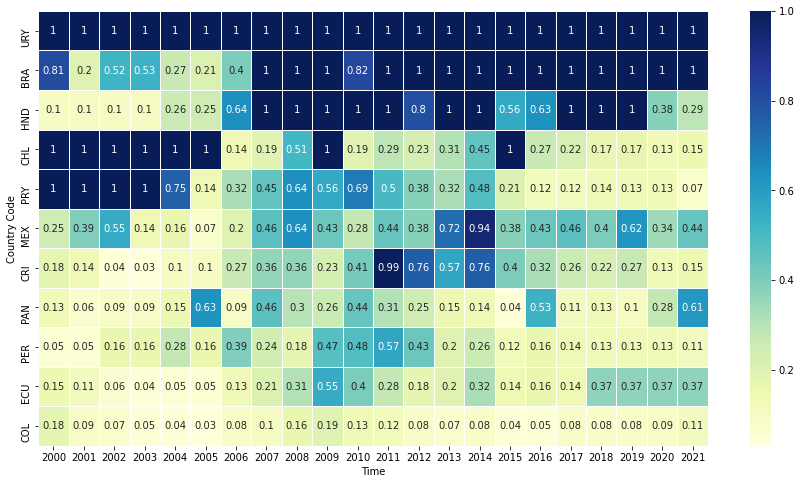

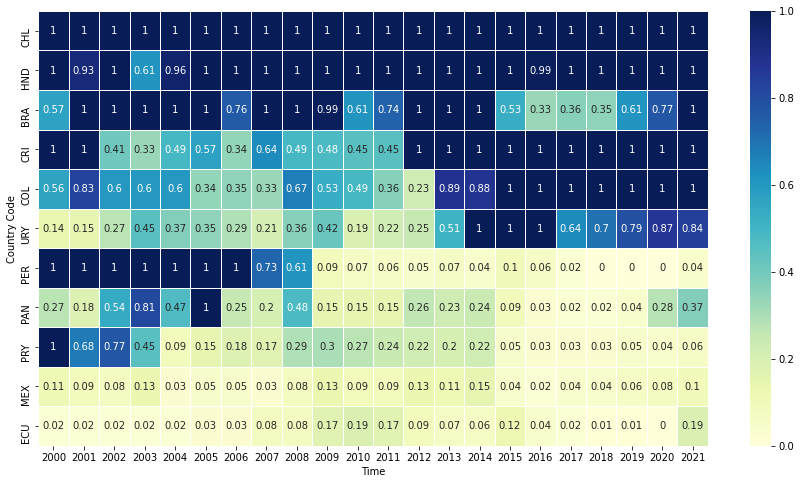

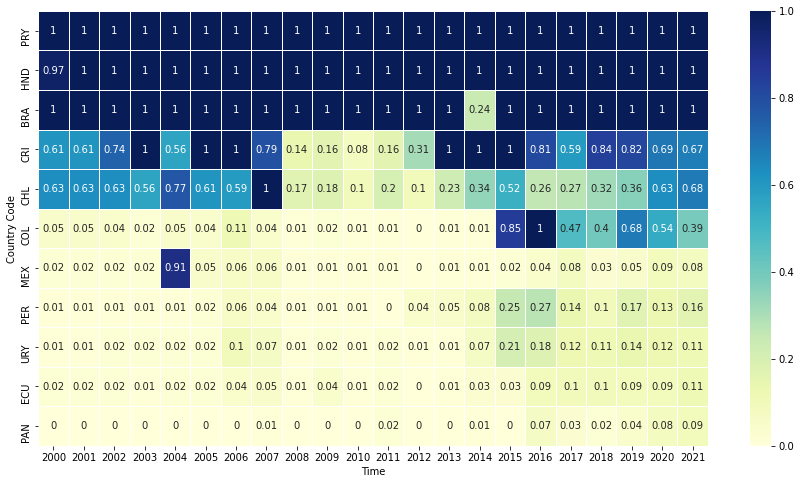

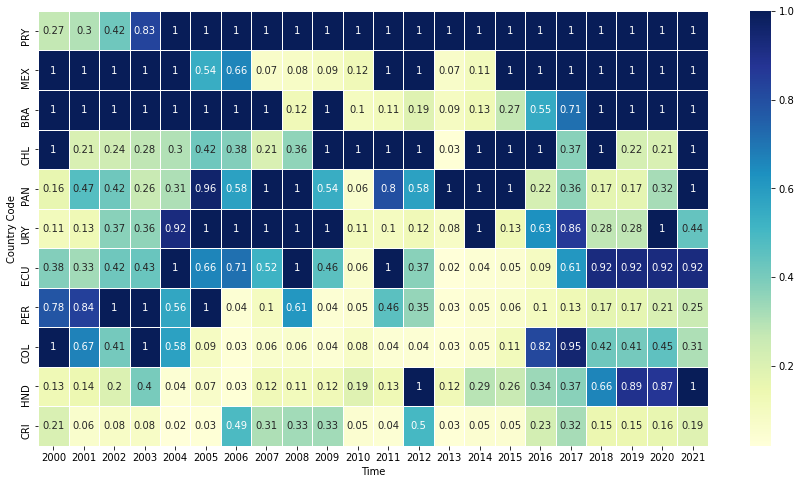

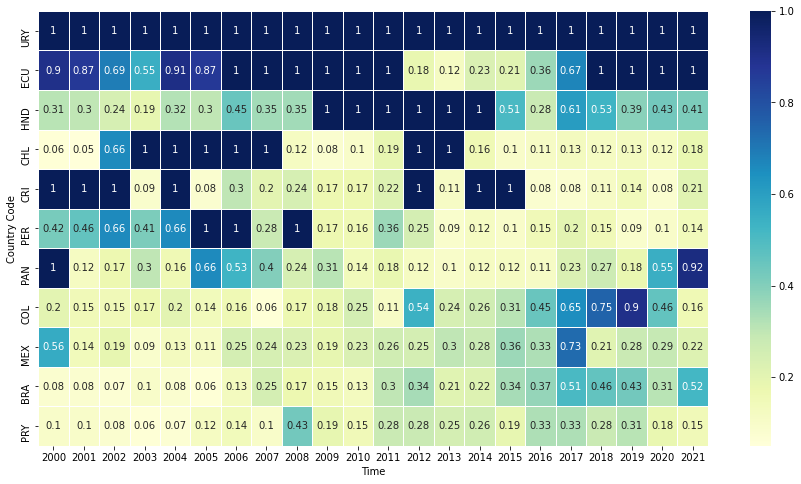

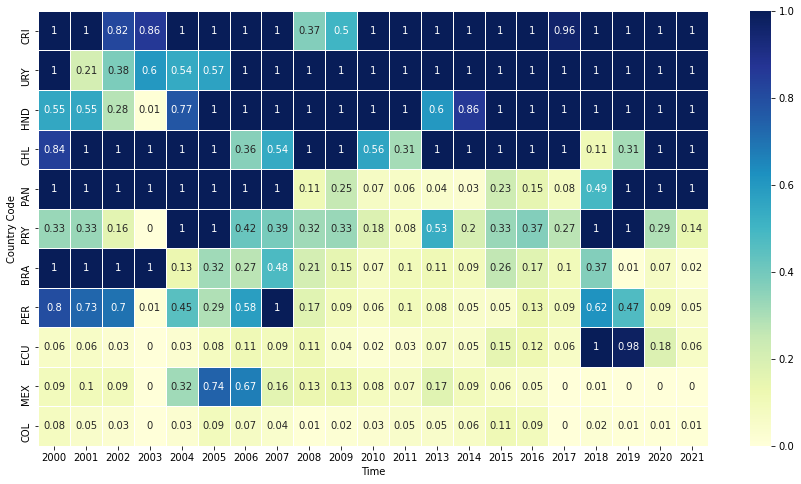

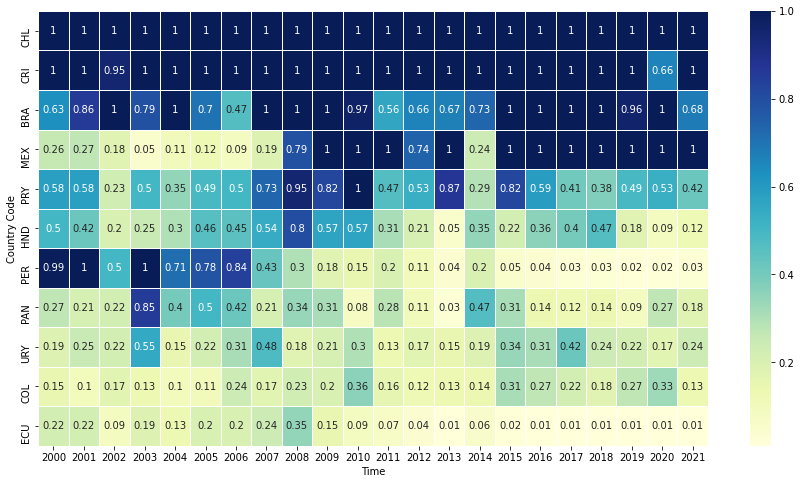

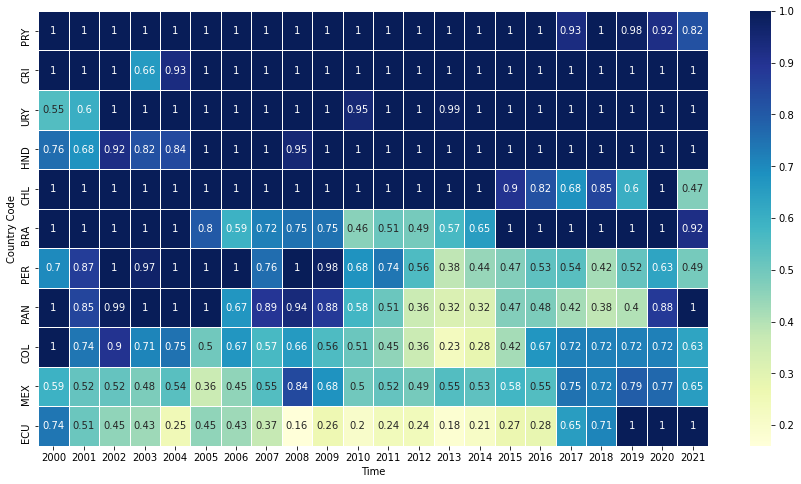

In [18]:
for score in  fdhs[inicio:fin]:
    dfg = df[ids + [score]]

    for i in [input, output, score]:
        dfg[i] = np.abs(dfg[i])

    #CREACIÓN DE CARPETA DE TIME SERIES

    time_series = f"{version}//1_TIMESERIES"
    if not os.path.exists(time_series):
        os.mkdir(time_series)

    #PIVOT TABLES
    pivot = dfg.pivot_table(values = score, index = "Country Code", columns = ["Time"]).round(2)
    pivot["general"] = pivot.T.sum(); pivot = pivot.sort_values(by = "general", ascending = False); pivot = pivot.drop(columns = ["general"])
    variable = f"{score.replace('_fdh', '')}"
    fig, ax =plt.subplots(figsize=(15,8))
    ax = sns.heatmap(pivot, cmap="YlGnBu", annot=True, linewidth=0.5, fmt='g')
    # plt.title(variable)
    plt.savefig(f"{time_series}//{variable}.jpg", dpi=200, bbox_inches = 'tight')


## Heat Maps por país

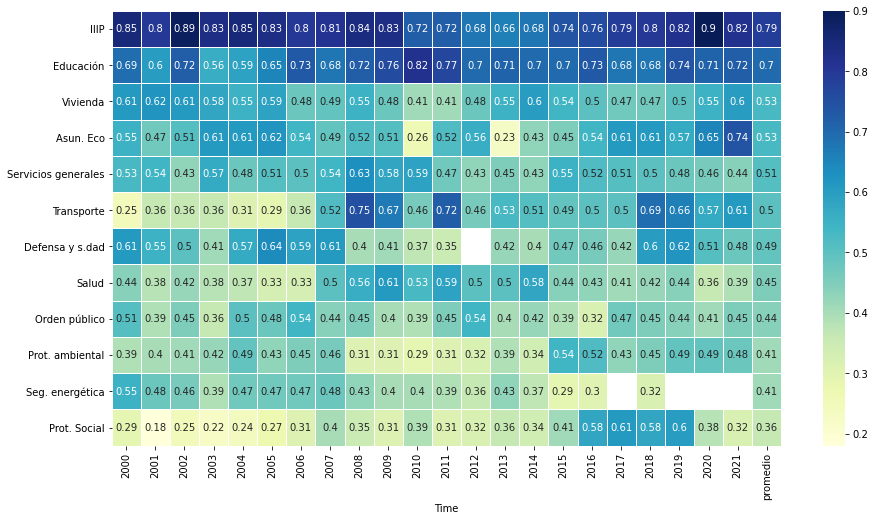

In [20]:
dfl = df[["Time"] + nombres ]
dfl = dfl.groupby("Time").mean().T.round(2)
dfl["promedio"] = dfl.T.mean()
dfl = dfl.sort_values(by = "promedio", ascending=False)
dfl = dfl.round(2)
fig, ax =plt.subplots(figsize=(15,8))
ax = sns.heatmap(dfl, cmap="YlGnBu", annot=True, linewidth=0.5, fmt='g')
    # plt.title(variable)
plt.savefig(f"{time_series}//LAC.jpg", dpi=200, bbox_inches = 'tight')

In [78]:
dff = pd.DataFrame()

In [79]:
for c in df["Country Code"].unique():


    dfc = df[df["Country Code"]==c]
    dfc = dfc[["Country Code", "Time"] + nombres ]
    dfc = dfc.iloc[:, 1:]
    dfc = dfc.set_index("Time")
    promedio = dfc.mean()
    dfc = dfc.T.round(2)
    dfc["promedio"] = dfc.T.mean()
    dfc = dfc.sort_values(by = "promedio", ascending=False)
    # indice_promedio = dfc.columns.get_loc("promedio")
    dfc = dfc.round(2)
    dfc = dfc[[2000,2005,2010,2015,2021, "promedio"]]
    dfc = dfc.T
    dfc = dfc.drop(columns = ["IIIP"])
    dfc = dfc.iloc[:, [0,1,2,8,9,10]].reset_index()
    dfc = dfc.T.reset_index()
    dfc["PAIS"] = c
    dfc["SECTORES"] = ["", "lider", "lider", "lider", "con margen de mejora", "con margen de mejor", "con margen de mejora"]

    dff = pd.concat([dff, dfc], axis = 0)

In [80]:
dff.to_excel("prueba.xlsx")

<ipython-input-80-da7e213e35d4>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  dff.to_excel("prueba.xlsx")


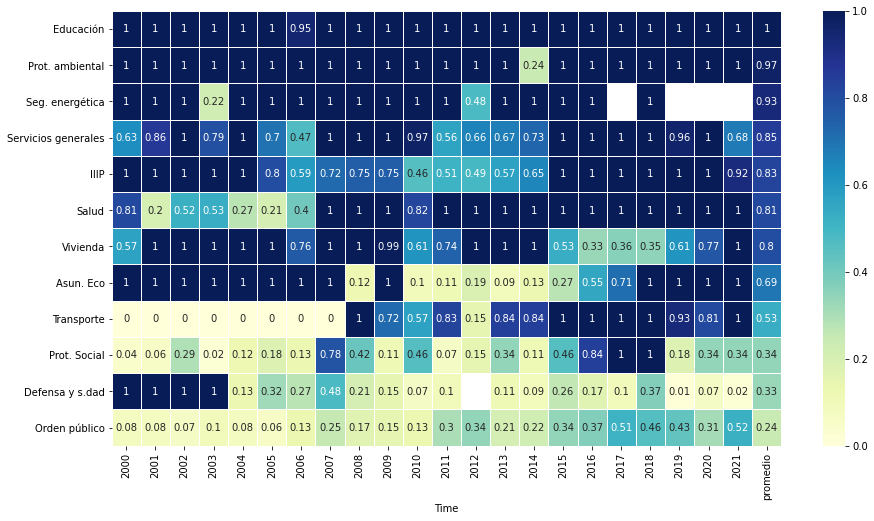

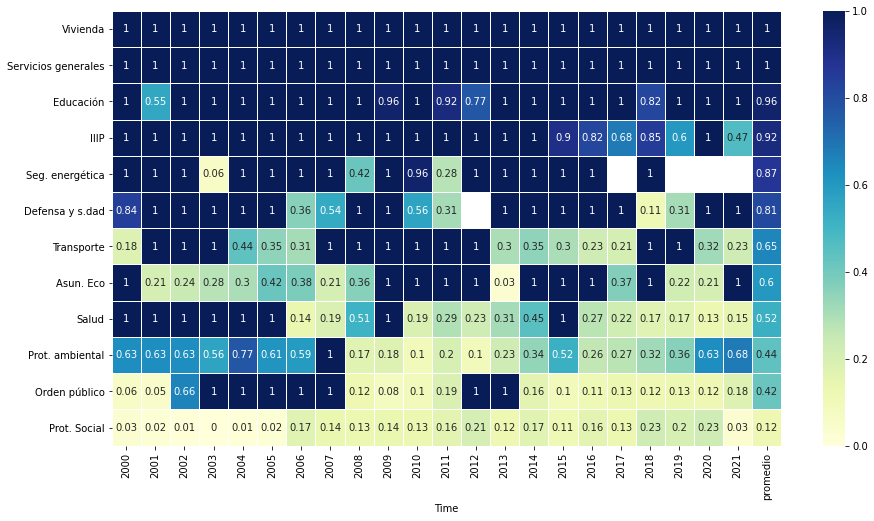

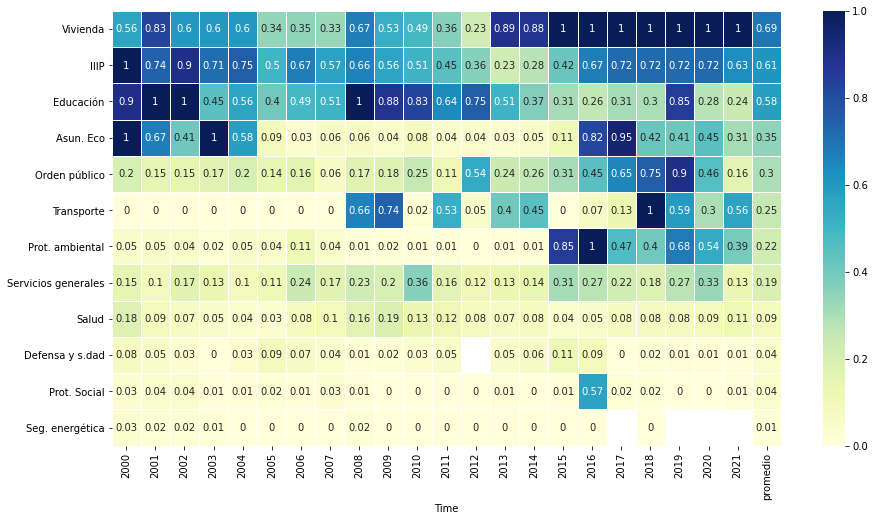

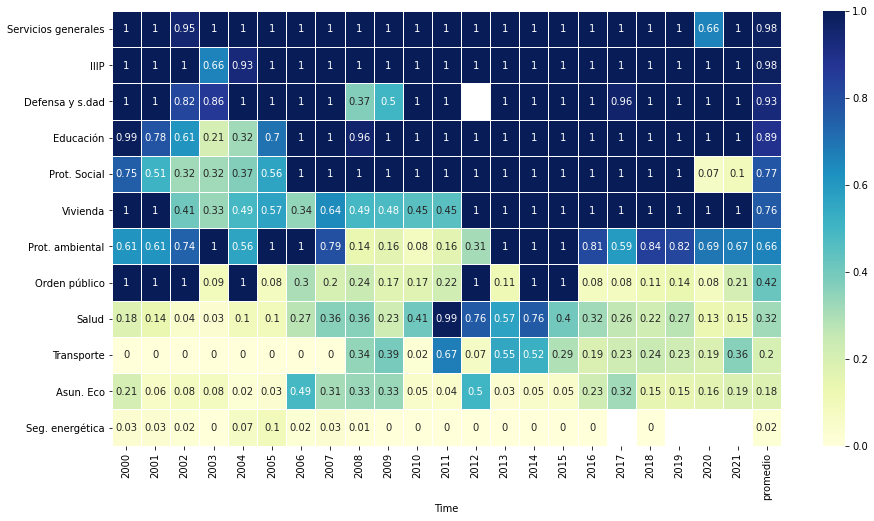

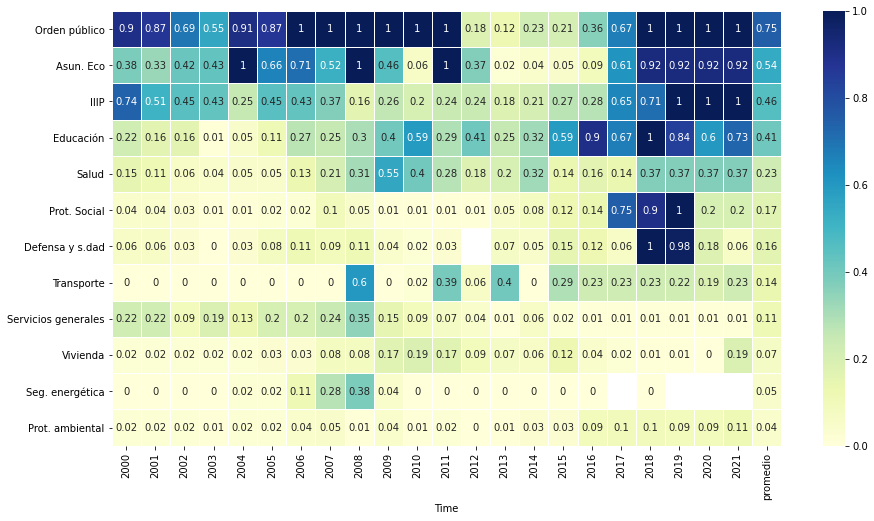

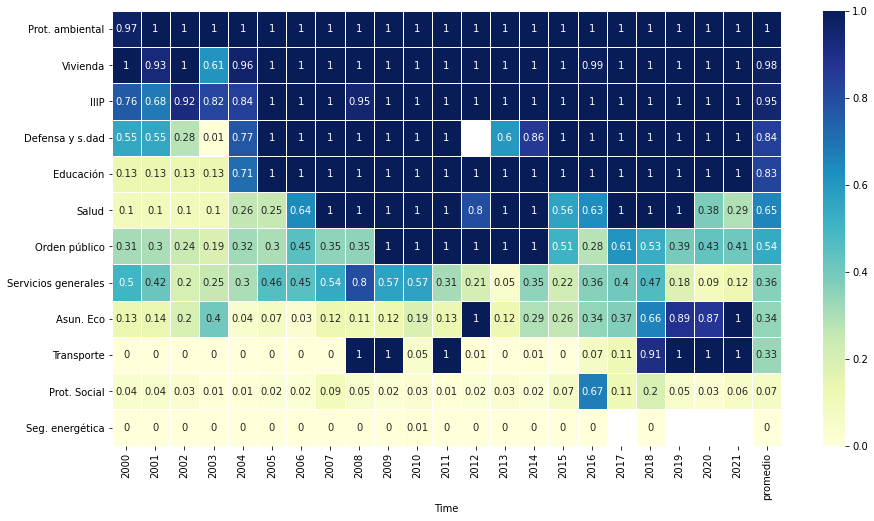

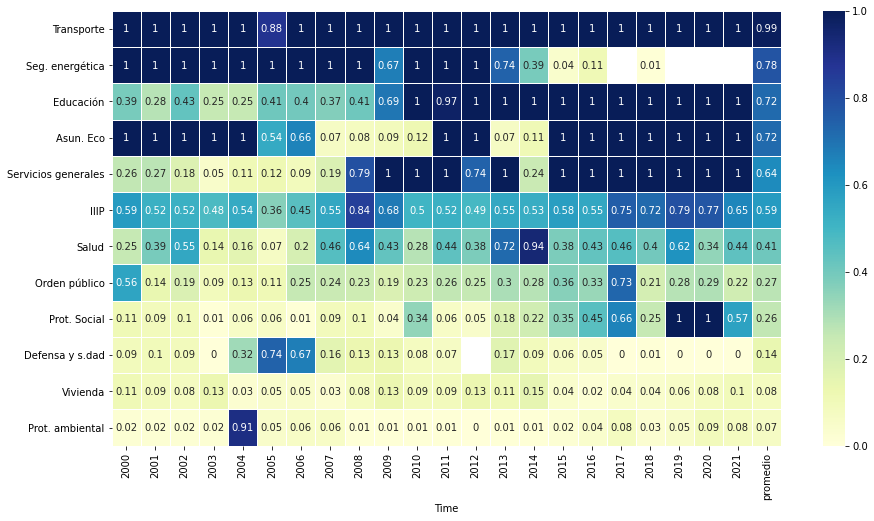

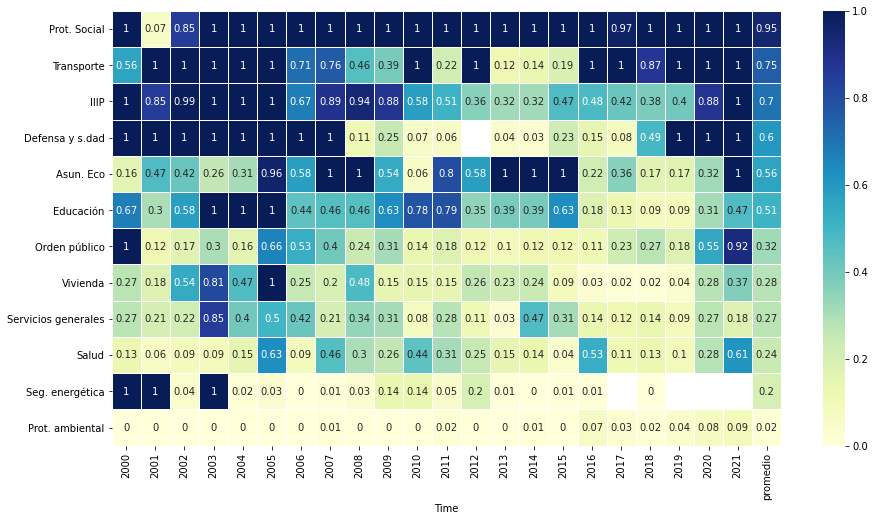

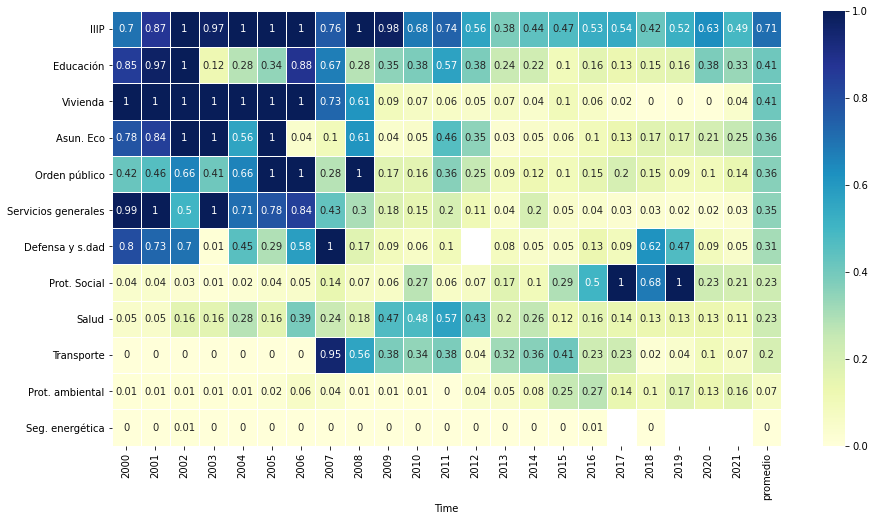

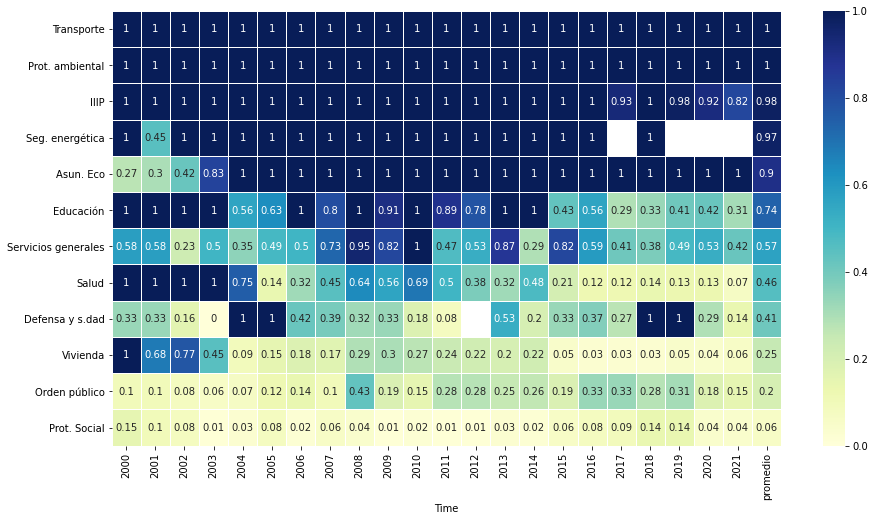

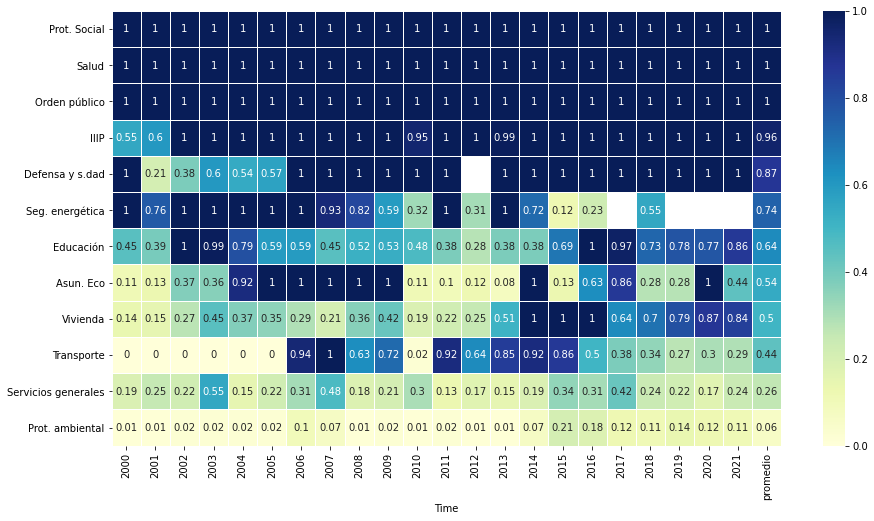

In [8]:
for c in df["Country Code"].unique():

    time_series = f"{version}//2_TIMESERIES"
    if not os.path.exists(time_series):
        os.mkdir(time_series)

    dfc = df[df["Country Code"]==c]
    dfc = dfc[["Country Code", "Time"] + nombres ]
    dfc = dfc.iloc[:, 1:]
    dfc = dfc.set_index("Time")
    promedio = dfc.mean()
    dfc = dfc.T.round(2)
    dfc["promedio"] = dfc.T.mean()
    dfc = dfc.sort_values(by = "promedio", ascending=False)
    dfc = dfc.round(2)
    fig, ax =plt.subplots(figsize=(15,8))
    ax = sns.heatmap(dfc, cmap="YlGnBu", annot=True, linewidth=0.5, fmt='g')
    # plt.title(variable)
    plt.savefig(f"{time_series}//{c}.jpg", dpi=200, bbox_inches = 'tight')

In [25]:
dfc

Time,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,promedio
Prot. Social,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Salud,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Orden público,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
IIIP,0.55,0.60,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.96
Defensa y s.dad,1.00,0.21,0.38,0.60,0.54,0.57,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.87
Seg. energética,1.00,0.76,1.00,1.00,1.00,1.00,1.00,0.93,0.82,0.59,...,1.00,0.72,0.12,0.23,NaN,0.55,NaN,NaN,NaN,0.74
Educación,0.45,0.39,1.00,0.99,0.79,0.59,0.59,0.45,0.52,0.53,...,0.38,0.38,0.69,1.00,0.97,0.73,0.78,0.77,0.86,0.64
Asun. Eco,0.11,0.13,0.37,0.36,0.92,1.00,1.00,1.00,1.00,1.00,...,0.08,1.00,0.13,0.63,0.86,0.28,0.28,1.00,0.44,0.54
Vivienda,0.14,0.15,0.27,0.45,0.37,0.35,0.29,0.21,0.36,0.42,...,0.51,1.00,1.00,1.00,0.64,0.70,0.79,0.87,0.84,0.50
Transporte,0.00,0.00,0.00,0.00,0.00,0.00,0.94,1.00,0.63,0.72,...,0.85,0.92,0.86,0.50,0.38,0.34,0.27,0.30,0.29,0.44


In [8]:
import glob as glob

### GIFS

In [9]:
import imageio

for variable in variables[1:]:

    #CREACIÓN DE CARPETA DE TIME SERIES
    gifs= f"{version}//3_SP_ANIM"
    if not os.path.exists(gifs):
        os.mkdir(gifs)

    # Obtener la lista de imágenes en la carpeta
    image_files = glob.glob(f"{sp}/{variable}*.jpg")

    # Configuración para el GIF
    gif_filename = f"{gifs}//{variable}.gif"
    frames = []

    # Leer las imágenes y agregarlas a la lista de frames
    for image_file in image_files:
        frame = imageio.imread(image_file)
        frames.append(frame)

    # Guardar los frames como un GIF
    imageio.mimsave(gif_filename, frames, duration=1.2)  # Duración en segundos por imagen

### GRAFICA CONDENSADA

In [3]:
df = pd.read_excel(f"(20240122)time_levelex(inputorientation).xlsx", sheet_name="all")
columnas = list(df.columns)
fdhs = [i for i in columnas if i.endswith('_fdh')]
ids = ["Country Code", "Time"]

In [4]:
dfr = df[ids+fdhs]

nans = dfr.isna().sum()
drop = list(nans[nans>70].index)
for i in drop:
    fdhs.remove(i)

dfr = df[ids+fdhs]

dfp = dfr.dropna()

In [5]:
tabla_total = dfr.groupby("Country Code").sum()
tabla_total = tabla_total.sort_values("Total_fdh", ascending = False).iloc[:, 1:].T
tabla_total = tabla_total.reset_index().rename(columns = {"index": "Explicativa"})

In [7]:
tabla_total.to_excel(f"2_RESULTS/TABLA_GENERAL_ML.xlsx", index = False)

<ipython-input-7-e26af36196c0>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  tabla_total.to_excel(f"2_RESULTS/TABLA_GENERAL_ML.xlsx", index = False)


Videos

In [8]:
import glob as glob
import cv2
import os

In [19]:
for variable in variables:

    # Obtener la lista de imágenes en la carpeta
    image_files = glob.glob(f"{version}/2_SP/{variable}*.jpg")

    # Configuración para el video
    frame_rate = 2  # 1 segundo por imagen
    video_filename = f"{version}//3_SP_ANIM//{variable}.mp4"

    # Obtener el tamaño de la primera imagen
    first_image = cv2.imread(image_files[0])
    height, width, layers = first_image.shape

    # Inicializar el objeto de video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec para video MP4
    video = cv2.VideoWriter(video_filename, fourcc, frame_rate, (width, height))

    # Crear el video
    for image_file in image_files:
        frame = cv2.imread(image_file)
        video.write(frame)

    # Liberar el objeto de video y finalizar
    video.release()
    cv2.destroyAllWindows()

In [10]:
import imageio

for variable in variables[1:]:
    # Obtener la lista de imágenes en la carpeta
    image_files = glob.glob(f"{version}//2_SP//{variable}*.jpg")

    # Configuración para el GIF
    gif_filename = f"{version}/3_SP_ANIM/{variable}.gif"
    frames = []

    # Leer las imágenes y agregarlas a la lista de frames
    for image_file in image_files:
        frame = imageio.imread(image_file)
        frames.append(frame)

    # Guardar los frames como un GIF
    imageio.mimsave(gif_filename, frames, duration=0.5)  # Duración en segundos por imagen
